In [2]:
import numpy as np 
import pandas as pd

In [4]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

In [6]:
from sklearn.ensemble import RandomForestRegressor


In [5]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()

dms=pd.get_dummies(df[['League', 'Division','NewLeague']])

y=df['Salary']
X_= df.drop(['Salary','League', 'Division','NewLeague'],axis=1).astype('float64')
X= pd.concat([X_, dms[['League_N', 'Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## Model Tahmin

In [7]:
rf_model=RandomForestRegressor(random_state=42).fit(X_train,y_train)

In [8]:
y_pred=rf_model.predict(X_test)

In [9]:
np.sqrt(mean_squared_error(y_test,y_pred))

344.8191624908484

## Model Tuning

In [12]:
rf_params={"max_depth": [5,8,10], 
            "max_features":[2,5,10],
           "n_estimators": [200,500,1000,2000],
           "min_samples_split":[2,10,80,100]}

In [13]:
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


In [14]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [15]:
rf_model_tuned=RandomForestRegressor(random_state=42,max_depth=8,max_features=2,
min_samples_split=2,n_estimators=200).fit(X_train,y_train)

In [16]:
y_pred=rf_model_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

349.1649379391149

### Değişken Önem Düzeyi

In [21]:
import matplotlib.pyplot as plt


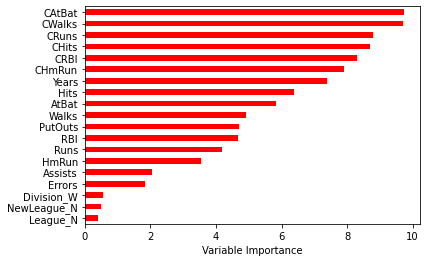

In [22]:
Importance=pd.DataFrame({"Importance": rf_model_tuned.feature_importances_*100},
                        index=X_train.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind="barh",color='r') 
plt.xlabel('Variable Importance')
plt.gca().legend_=None